In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [3]:
#import the desire dataset
os.chdir("C:\\Users\\Local User\\Downloads\\Compressed\\Project-2")
df=pd.read_csv("heart_disease_patients.csv")


In [4]:
df.head(50)
df.tail(50)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
253,254,51,0,3,120,295,0,2,157,0,0.6,1
254,255,43,1,4,115,303,0,0,181,0,1.2,2
255,256,42,0,3,120,209,0,0,173,0,0.0,2
256,257,67,0,4,106,223,0,0,142,0,0.3,1
257,258,76,0,3,140,197,0,1,116,0,1.1,2
258,259,70,1,2,156,245,0,2,143,0,0.0,1
259,260,57,1,2,124,261,0,0,141,0,0.3,1
260,261,44,0,3,118,242,0,0,149,0,0.3,2
261,262,58,0,2,136,319,1,2,152,0,0.0,1
262,263,60,0,1,150,240,0,0,171,0,0.9,1


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


In [6]:
#drope id columns from dataset
df1=df.drop(columns="id")
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,1,1,145,233,1,2,150,0,2.3,3
1,67,1,4,160,286,0,2,108,1,1.5,2
2,67,1,4,120,229,0,2,129,1,2.6,2
3,37,1,3,130,250,0,0,187,0,3.5,3
4,41,0,2,130,204,0,2,172,0,1.4,1
...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2
299,68,1,4,144,193,1,0,141,0,3.4,2
300,57,1,4,130,131,0,0,115,1,1.2,2
301,57,0,2,130,236,0,2,174,0,0.0,2


In [7]:
X=df1.values

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X  = sc.fit_transform(X)
X

array([[ 0.94872647,  0.68620244, -2.25177456, ..., -0.69663055,
         1.08733806,  2.27457861],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  1.43548113,
         0.39718162,  0.64911323],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  1.43548113,
         1.34614673,  0.64911323],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  1.43548113,
         0.13837295,  0.64911323],
       [ 0.28381332, -1.4572959 , -1.20852121, ..., -0.69663055,
        -0.89686172,  0.64911323],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.69663055,
        -0.89686172, -0.97635214]])

In [9]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=303,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

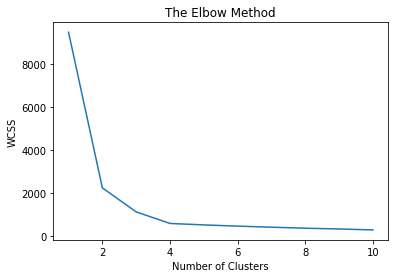

In [10]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
wcss

[9503.839405195662,
 2242.348435663217,
 1121.6186814534942,
 581.9423310738638,
 514.2276851079981,
 457.218594693064,
 407.61506170623886,
 359.78359364952126,
 323.6843726740521,
 280.3842723923829]

In [12]:
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0
 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1]


In [13]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X,cluster_labels))

0.7050703596985688


For n_clusters = 2 The average silhouette_score is : 0.7050703596985688
For n_clusters = 3 The average silhouette_score is : 0.5850978951036888
For n_clusters = 4 The average silhouette_score is : 0.6292796128937886
For n_clusters = 5 The average silhouette_score is : 0.5529704747930654
For n_clusters = 6 The average silhouette_score is : 0.47418027753932285


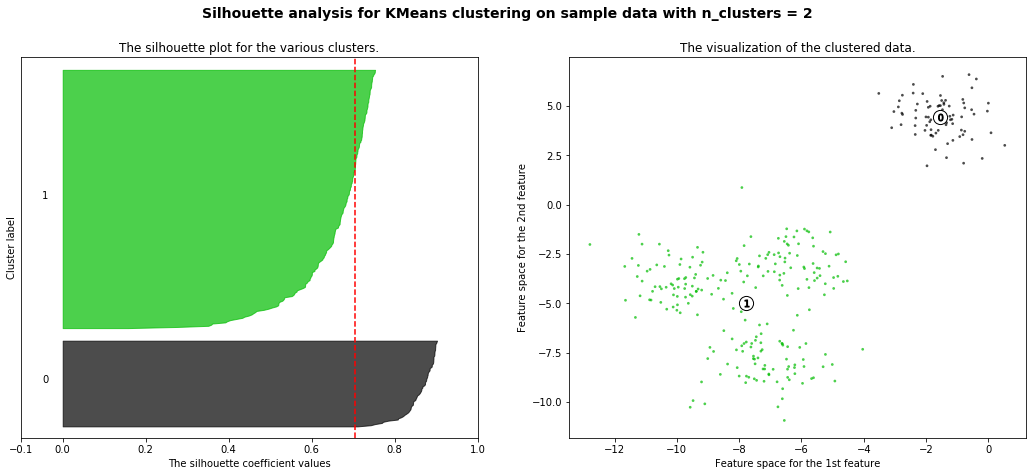

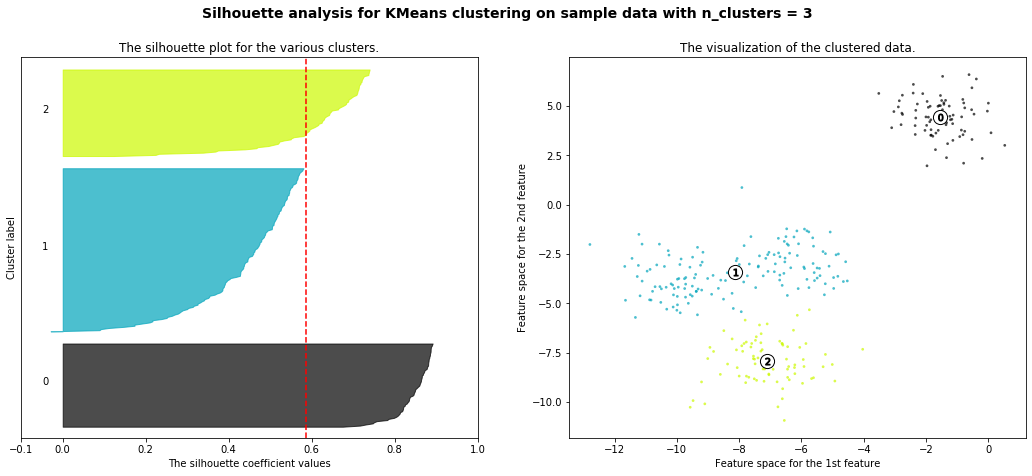

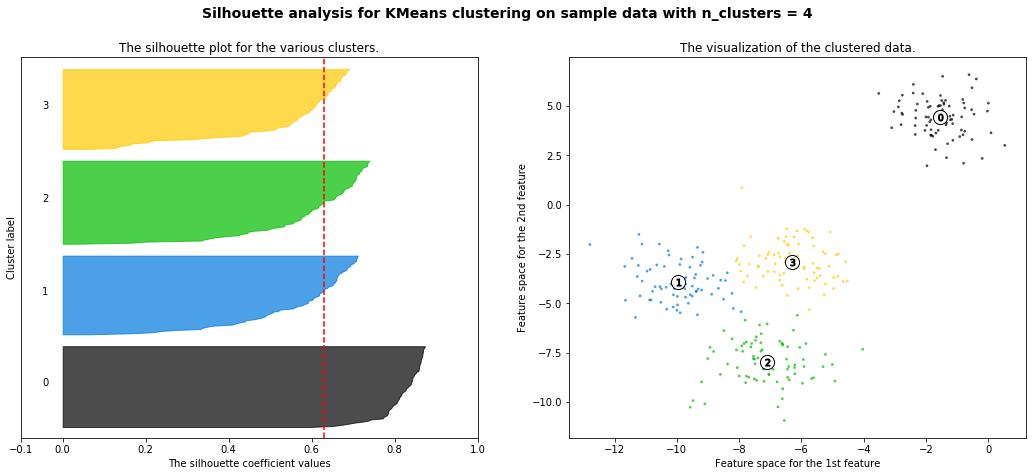

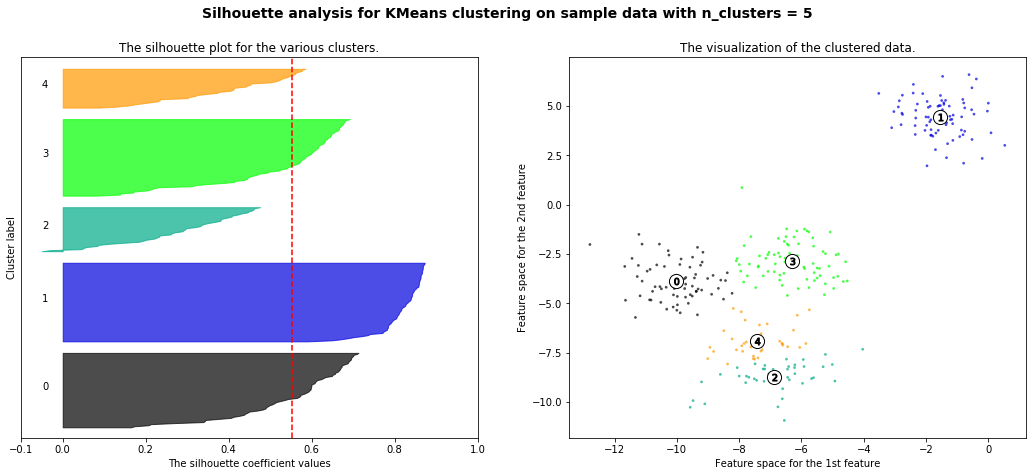

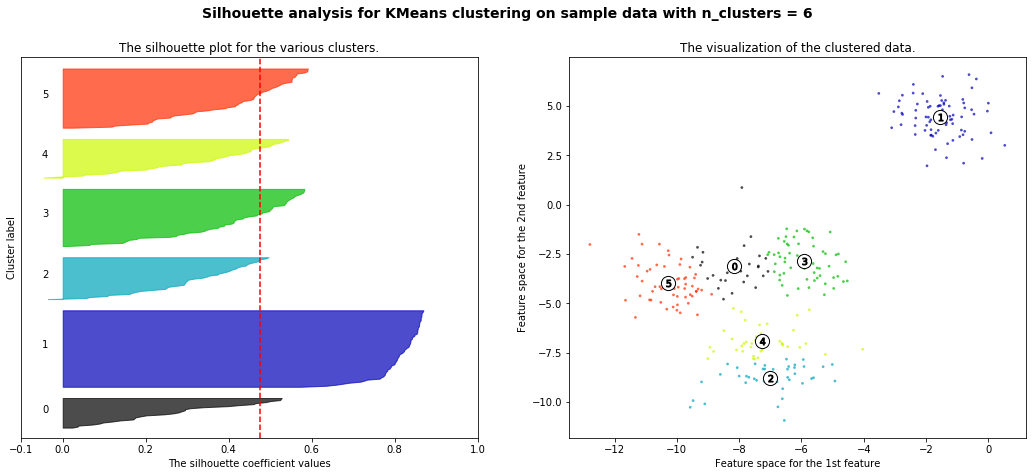

In [14]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [15]:
pd.concat([df1,pd.DataFrame(cluster_labels)],axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,0
0,63,1,1,145,233,1,2,150,0,2.3,3,2
1,67,1,4,160,286,0,2,108,1,1.5,2,5
2,67,1,4,120,229,0,2,129,1,2.6,2,5
3,37,1,3,130,250,0,0,187,0,3.5,3,2
4,41,0,2,130,204,0,2,172,0,1.4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,3
299,68,1,4,144,193,1,0,141,0,3.4,2,2
300,57,1,4,130,131,0,0,115,1,1.2,2,5
301,57,0,2,130,236,0,2,174,0,0.0,2,3


In [16]:
# Hierarchical clustering: another clustering approach 
k = 4
m = 303

df2= make_blobs(n_samples= m, n_features=2, centers=k, cluster_std=1.3)
df2

(array([[ -2.61160074,  -3.47095719],
        [  6.26596508,  -7.82761222],
        [  7.783959  ,  -8.06332029],
        [  1.03496798,  -7.41231233],
        [  7.61391079,  -6.53107223],
        [ -9.47470138,   1.32845521],
        [  4.20748464,  -7.26015812],
        [  5.62572435,  -7.52921968],
        [ -4.00516959,  -3.38202183],
        [  2.16425844,  -6.91354968],
        [  1.84662472,  -8.48564128],
        [  5.69520967,  -7.46534041],
        [  2.10802847,  -8.889289  ],
        [ -7.53985097,   1.06520488],
        [  0.60282162,  -7.8577513 ],
        [  6.50145275,  -6.43453204],
        [-10.81140119,   3.34999595],
        [  2.14644464,  -7.14538796],
        [ -2.90277413,  -4.21395671],
        [ -2.47641068,  -4.19057134],
        [  1.2981038 ,  -7.42144113],
        [ -1.72920404,  -4.03930481],
        [ -7.19653283,   1.55369179],
        [  0.53652135,  -8.51296177],
        [ -3.45468145,  -4.88682275],
        [  1.36209241, -10.00317566],
        [ -2

In [17]:
Y=df2[0]

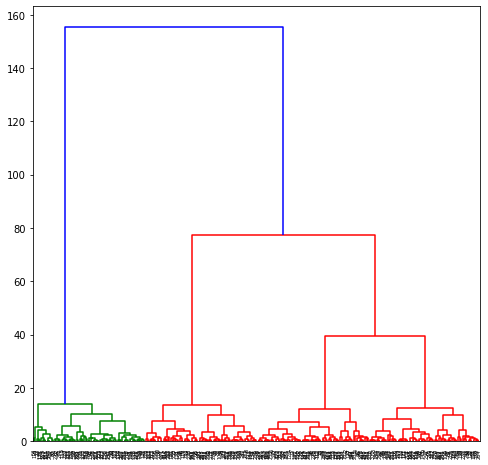

In [18]:

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(8,8))
dendrogram = sch.dendrogram(sch.linkage(Y, method = 'ward'))

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(Y)

In [20]:
print(silhouette_score(Y,y_hc))

0.6126215650326272


In [21]:
#check the accuracy for all the clusters
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters=n_clusters ,affinity='euclidean' ,linkage='ward')
    y_hc = hc.fit_predict(Y)
   
 # clusters
    silhouette_avg = silhouette_score(Y, y_hc)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y, y_hc)


For n_clusters = 2 The average silhouette_score is : 0.6544168977414925
For n_clusters = 3 The average silhouette_score is : 0.6282152925782908
For n_clusters = 4 The average silhouette_score is : 0.6126215650326272
For n_clusters = 5 The average silhouette_score is : 0.5228116422662547
For n_clusters = 6 The average silhouette_score is : 0.4557875982669475


In [22]:
#output
hc_output=pd.concat([df1 ,pd.DataFrame(y_hc)],axis=1)
hc_output

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,0
0,63,1,1,145,233,1,2,150,0,2.3,3,5
1,67,1,4,160,286,0,2,108,1,1.5,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,3
299,68,1,4,144,193,1,0,141,0,3.4,2,1
300,57,1,4,130,131,0,0,115,1,1.2,2,0
301,57,0,2,130,236,0,2,174,0,0.0,2,1


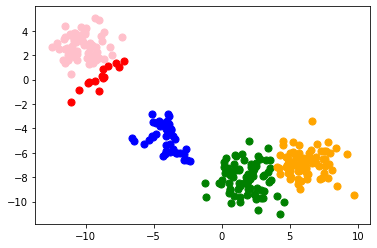

In [23]:
plt.scatter(Y[y_hc==0,0],Y[y_hc==0,1],s=50,c="green")
plt.scatter(Y[y_hc==1,0],Y[y_hc==1,1],s=50,c="orange")
plt.scatter(Y[y_hc==2,0],Y[y_hc==2,1],s=50,c="pink")
plt.scatter(Y[y_hc==3,0],Y[y_hc==3,1],s=50,c="blue")
plt.scatter(Y[y_hc==4,0],Y[y_hc==4,1],s=50,c="red")



plt.show()